In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,r2_score


In [53]:
# Load Dataset
df=pd.read_csv(r"d:\2025 to 2026 Data science\Project\Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [54]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [55]:
df.shape

(9994, 11)

In [56]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [59]:
df["Sales"]=pd.to_numeric(df['Sales'],errors='coerce')
df["Profit"]=pd.to_numeric(df['Profit'],errors='coerce')
df["Discount"]=pd.to_numeric(df['Discount'],errors='coerce')
df["Order Date"]=pd.to_datetime(df['Order Date'], dayfirst=True,errors='coerce')

In [60]:
print(df[['Order Date','Sales','Profit','Discount']].isnull().sum())

Order Date    5952
Sales            0
Profit           0
Discount         0
dtype: int64


In [61]:
df=df.dropna(subset=['Order Date','Sales']).reset_index(drop=True)

In [62]:

#Extract date ports
df['order_day']=df['Order Date'].dt.day
df["order_month"]=df['Order Date'].dt.month
df['order_month_name']=df['Order Date'].dt.strftime('%B')
df['order_year']=df['Order Date'].dt.year
df['day_of_week']=df['Order Date'].dt.day_name()
df['is_weekend']=df['day_of_week'].isin(['Saturday','Sunday']).astype(int)

In [63]:
#profit margin(if sales >0)
df['Profit_margin']=df['Profit']/df['Sales']
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,order_day,order_month,order_month_name,order_year,day_of_week,is_weekend,Profit_margin
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,August,2017,Friday,0,0.32
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,August,2017,Friday,0,0.20
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,12,December,2017,Wednesday,0,0.07
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,10,11,November,2016,Thursday,0,0.10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,10,11,November,2016,Thursday,0,0.39


<function matplotlib.pyplot.show(close=None, block=None)>

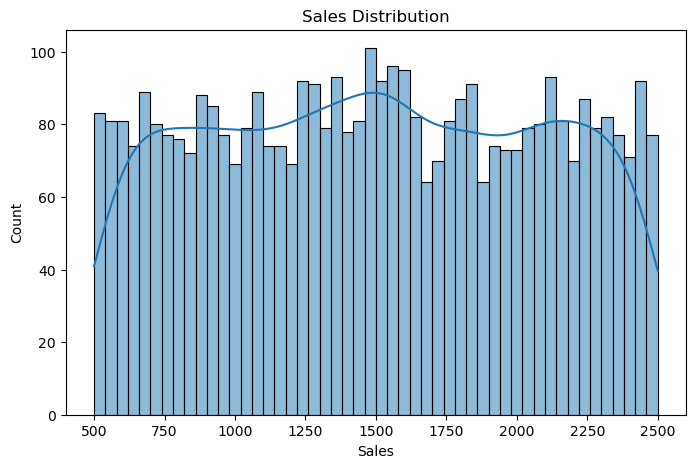

In [64]:
#sales distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'],bins=50,kde=True)
plt.title("Sales Distribution")
plt.show

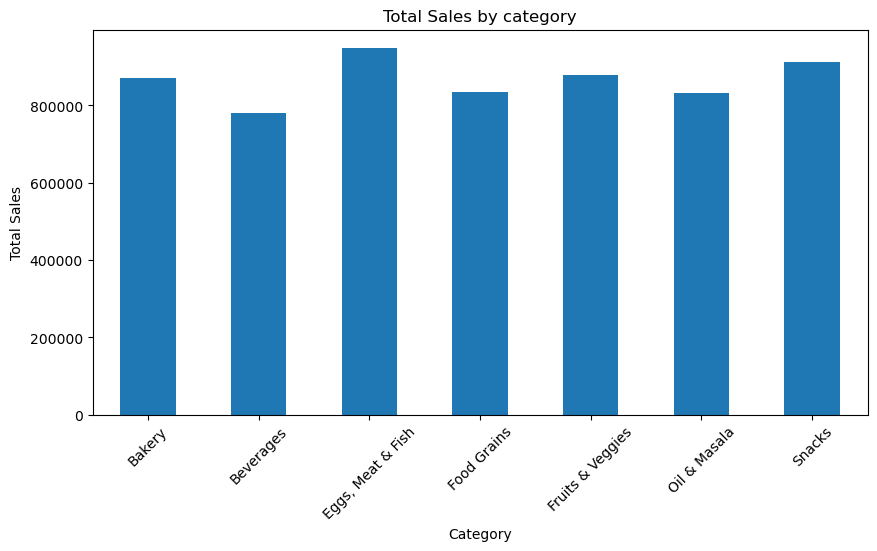

In [65]:
#Sales by category(bar chart)
plt.figure(figsize=(10,5))
sales_by_cat=df.groupby('Category')['Sales'].sum()
sales_by_cat.plot(kind='bar')
plt.title('Total Sales by category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\seema\AppData\Local\Temp\ipykernel_32424\3968419827.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly=df.set_index('Order Date').resample('M')['Sales'].sum()


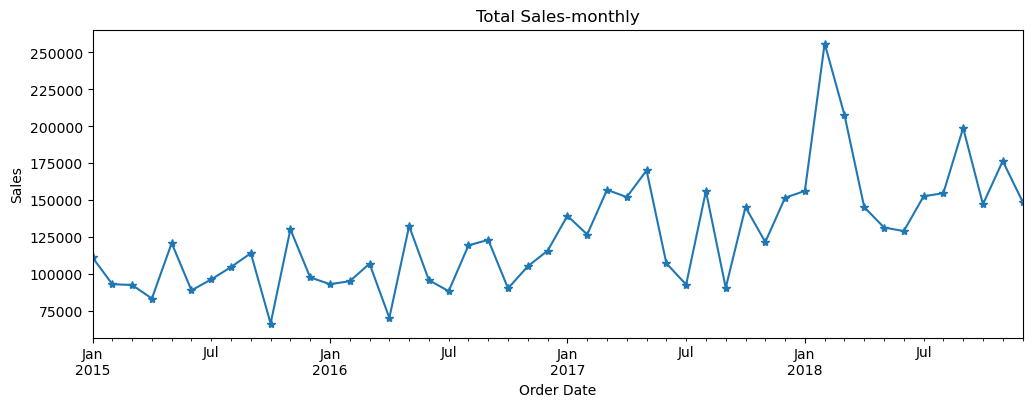

In [66]:
#Sales over time monthly
monthly=df.set_index('Order Date').resample('M')['Sales'].sum()
plt.figure(figsize=(12,4))
monthly.plot(marker='*')
plt.title('Total Sales-monthly')
plt.ylabel('Sales')
plt.show()

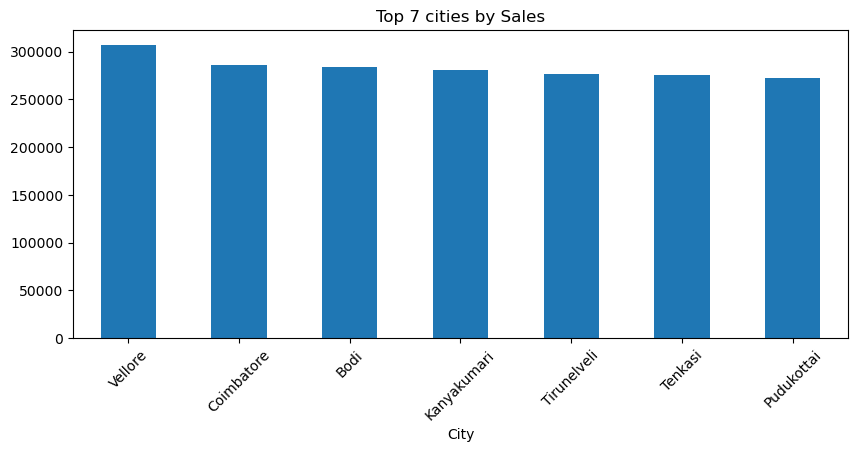

In [67]:
#top 7 cities by sales
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(10,4))
top_cities.plot(kind='bar')
plt.title("Top 7 cities by Sales")
plt.xticks(rotation=45)
plt.show()

In [68]:
# Choose basic columns
features = ['Category','Sub Category','City','Region','order_month','Discount','Profit','is_weekend']


In [69]:
# Keep only rows without missing for chosen features
df_model = df[features + ['Sales']].dropna().copy()

In [70]:
# One-hot encode categorical columns
df_model = pd.get_dummies(df_model, columns=['Category','Sub Category','City','Region'], drop_first=True)


In [71]:
#Split
X = df_model.drop(columns=['Sales'])
y = df_model['Sales']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (3233, 59) Test shape: (809, 59)


In [73]:

# Scale numeric columns (Discount, Profit, order_month) - find numeric cols automatically
num_cols = ['Discount','Profit','order_month']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [76]:
# model 1 linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression -> MSE: {:.2f}, R2: {:.4f}".format(mse_lr, r2_lr))

Linear Regression -> MSE: 215574.25, R2: 0.3556


In [ ]:
# Model 2 Random Forest(better Baseline)
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest -> MSE: {:.2f}, R2: {:.4f}".format(mse_rf, r2_rf))

Random Forest -> MSE: 227573.14, R2: 0.3197


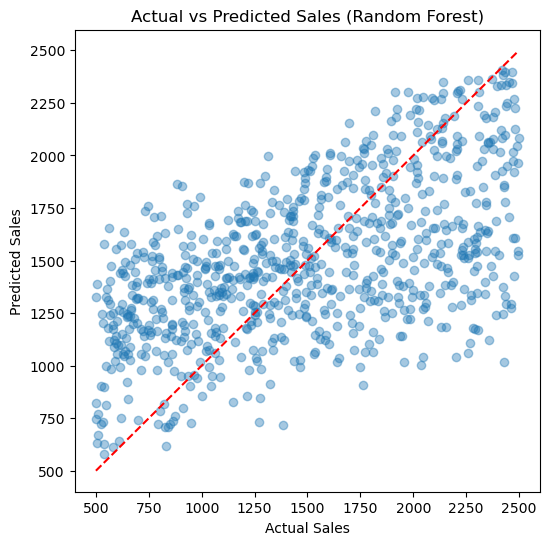

In [80]:
# Use RF predictions (or LR if you prefer)
y_true = y_test
y_pred = y_pred_rf

plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.4)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, 'r--')  # perfect line
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()